In [279]:
import pandas as pd

In [280]:
df = pd.read_csv("crash_data.csv")

/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,20,73,77,78,79,80,81,82,83,84,183,189) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [285]:
df.head()

,,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,ILLUMINATION,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
CRASH_CRN,ROADWAY_CRN,,,,,,,,,,,,,,,,,,,,,
2004000001,2.004000e+09,11,2,2454,02454,2004,1,5,257.0,2.0,2,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
2004000010,2.004000e+09,11,2,2440,02440,2004,1,5,1027.0,10.0,1,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2004000016,2.004000e+09,11,2,2203,02203,2004,1,5,1839.0,18.0,2,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
2004000022,2.004000e+09,11,2,2404,02404,2004,1,6,914.0,9.0,1,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
2004000030,2.004000e+09,11,2,2419,02419,2004,1,5,2230.0,22.0,3,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN


In [287]:
#df.index = df.CRASH_CRN
df = df.set_index(['CRASH_CRN', 'ROADWAY_CRN'])

KeyError: "None of ['CRASH_CRN', 'ROADWAY_CRN'] are in the columns"

In [288]:
df.shape

(204898, 188)

In [289]:
df['STREET_NAME']

CRASH_CRN   ROADWAY_CRN 
2004000001  2.004000e+09            LEWIS RUN RD
2004000010  2.004000e+09          COAL VALLEY RD
2004000016  2.004000e+09    CLINTON FRANKFORT RD
2004000022  2.004000e+09          NORTH BALPH AV
2004000030  2.004000e+09           THORNBERRY DR
                                    ...         
2021017633  2.021018e+09             MCKNIGHT RD
2021018779  2.021019e+09     ALLEGHENY VALLEY EX
2021019758  2.021020e+09               SENECA ST
2021021042  2.021021e+09                 FORD ST
2021021504  2.021022e+09         PENN LINCOLN PY
Name: STREET_NAME, Length: 204898, dtype: object

In [291]:
import seaborn as sns

<AxesSubplot:ylabel='CRASH_CRN-ROADWAY_CRN'>

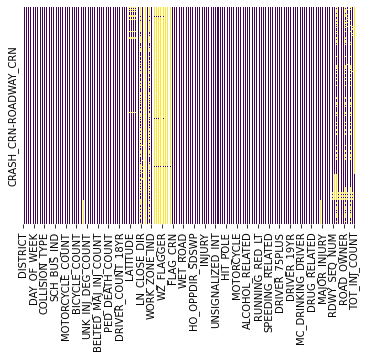

In [292]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [293]:
#Drop all columns with more than 50% nAn
perc = 50.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [294]:
df.shape

(204898, 170)

<AxesSubplot:ylabel='CRASH_CRN-ROADWAY_CRN'>

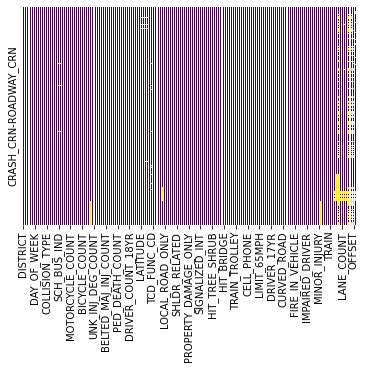

In [295]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [296]:
for col in df.columns:
    print(col)

# if we have lat and long we dont need any other location data 
# all time data
# weather and light 
# type of crash 
# road_condition
# could create different dataframes for different things
    # ie what they hit, what was involved, weather, 

DISTRICT
CRASH_COUNTY
MUNICIPALITY
POLICE_AGCY
CRASH_YEAR
CRASH_MONTH
DAY_OF_WEEK
TIME_OF_DAY
HOUR_OF_DAY
ILLUMINATION
WEATHER
ROAD_CONDITION
COLLISION_TYPE
RELATION_TO_ROAD
INTERSECT_TYPE
TCD_TYPE
URBAN_RURAL
LOCATION_TYPE
SCH_BUS_IND
SCH_ZONE_IND
TOTAL_UNITS
PERSON_COUNT
VEHICLE_COUNT
AUTOMOBILE_COUNT
MOTORCYCLE_COUNT
BUS_COUNT
SMALL_TRUCK_COUNT
HEAVY_TRUCK_COUNT
SUV_COUNT
VAN_COUNT
BICYCLE_COUNT
FATAL_COUNT
INJURY_COUNT
MAJ_INJ_COUNT
MOD_INJ_COUNT
MIN_INJ_COUNT
UNK_INJ_DEG_COUNT
UNK_INJ_PER_COUNT
UNBELTED_OCC_COUNT
UNB_DEATH_COUNT
UNB_MAJ_INJ_COUNT
BELTED_DEATH_COUNT
BELTED_MAJ_INJ_COUNT
MCYCLE_DEATH_COUNT
MCYCLE_MAJ_INJ_COUNT
BICYCLE_DEATH_COUNT
BICYCLE_MAJ_INJ_COUNT
PED_COUNT
PED_DEATH_COUNT
PED_MAJ_INJ_COUNT
COMM_VEH_COUNT
MAX_SEVERITY_LEVEL
DRIVER_COUNT_16YR
DRIVER_COUNT_17YR
DRIVER_COUNT_18YR
DRIVER_COUNT_19YR
DRIVER_COUNT_20YR
DRIVER_COUNT_50_64YR
DRIVER_COUNT_65_74YR
DRIVER_COUNT_75PLUS
LATITUDE
LONGITUDE
DEC_LAT
DEC_LONG
LANE_CLOSED
NTFY_HIWY_MAINT
TCD_FUNC_CD
WORK_ZONE_IND


In [ ]:
# went through the columns and decided on the tpye of data to isolate

In [297]:
times = df[['CRASH_YEAR' , 'CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'HOUR_OF_DAY']]

In [298]:
print(times.shape)
times.head()
#time of day needs the colon for time data

(204898, 5)


,,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY
CRASH_CRN,ROADWAY_CRN,,,,,
2004000001,2.004000e+09,2004,1,5,257.0,2.0
2004000010,2.004000e+09,2004,1,5,1027.0,10.0
2004000016,2.004000e+09,2004,1,5,1839.0,18.0
2004000022,2.004000e+09,2004,1,6,914.0,9.0
2004000030,2.004000e+09,2004,1,5,2230.0,22.0


In [299]:
location = df[['DISTRICT', 'CRASH_COUNTY', 'MUNICIPALITY','LATITUDE','LONGITUDE','LOCATION_TYPE','DEC_LAT','DEC_LONG', 'STREET_NAME']]

In [301]:
#decided to inlcude on three columns in location
print(location.shape)
location = location[['DEC_LAT','DEC_LONG','STREET_NAME']]
location.head()

(204898, 3)


,,DEC_LAT,DEC_LONG,STREET_NAME
CRASH_CRN,ROADWAY_CRN,,,
2004000001,2.004000e+09,40.3234,-79.9404,LEWIS RUN RD
2004000010,2.004000e+09,40.3182,-79.9076,COAL VALLEY RD
2004000016,2.004000e+09,40.4886,-80.3371,CLINTON FRANKFORT RD
2004000022,2.004000e+09,NaN,NaN,NORTH BALPH AV
2004000030,2.004000e+09,NaN,NaN,THORNBERRY DR


<AxesSubplot:ylabel='CRASH_CRN-ROADWAY_CRN'>

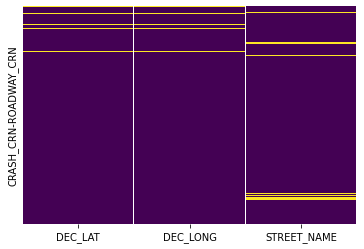

In [302]:
sns.heatmap(location.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [303]:
crash_count = df[[
'AUTOMOBILE_COUNT',
'MOTORCYCLE_COUNT',
'BUS_COUNT',
'SMALL_TRUCK_COUNT',
'HEAVY_TRUCK_COUNT',
'SUV_COUNT',
'VAN_COUNT',
'BICYCLE_COUNT',
'MOTORCYCLE',
'BICYCLE',
'PED_COUNT'
]]

In [304]:
crash_count.head()

,,AUTOMOBILE_COUNT,MOTORCYCLE_COUNT,BUS_COUNT,SMALL_TRUCK_COUNT,HEAVY_TRUCK_COUNT,SUV_COUNT,VAN_COUNT,BICYCLE_COUNT,MOTORCYCLE,BICYCLE,PED_COUNT
CRASH_CRN,ROADWAY_CRN,,,,,,,,,,,
2004000001,2.004000e+09,0,0,0,1,0,0,0,0,0,0,0
2004000010,2.004000e+09,1,0,0,0,0,0,0,0,0,0,0
2004000016,2.004000e+09,1,0,0,0,0,0,0,0,0,0,0
2004000022,2.004000e+09,1,0,0,0,1,0,0,0,0,0,0
2004000030,2.004000e+09,1,0,0,0,0,0,0,0,0,0,0


<ipython-input-307-12e9922ce11b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_count['vehicle_type'] = 1
/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

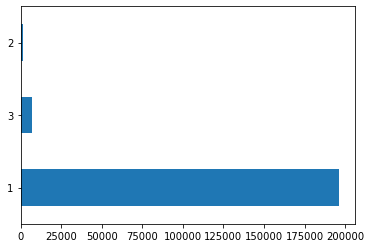

In [307]:
# create a new column that only has data on the type of vehicle involved, car, bike, pedestrian. 
import matplotlib as plt
crash_count['vehicle_type'] = 1
crash_count.loc[crash_count.PED_COUNT != 0, 'vehicle_type'] = "3"
crash_count.loc[crash_count.BICYCLE_COUNT != 0, 'vehicle_type'] = "2"
crash_count['vehicle_type'].value_counts().plot(kind='barh')
crash_count = crash_count[["vehicle_type"]]
print(crash_count.shape)

In [309]:
# due to the small number of crashes that involove ped or bike we decided to strictly focus on car crashes
crash_count = crash_count[crash_count.vehicle_type == 1]
crash_count

,,vehicle_type
CRASH_CRN,ROADWAY_CRN,
2004000001,2.004000e+09,1
2004000010,2.004000e+09,1
2004000016,2.004000e+09,1
2004000022,2.004000e+09,1
2004000030,2.004000e+09,1
...,...,...
2021017633,2.021018e+09,1
2021018779,2.021019e+09,1
2021019758,2.021020e+09,1


In [310]:
weather = df[['ILLUMINATION','WEATHER','ROAD_CONDITION']]

In [311]:
weather.head()

,,ILLUMINATION,WEATHER,ROAD_CONDITION
CRASH_CRN,ROADWAY_CRN,,,
2004000001,2.004000e+09,2,1.0,0.0
2004000010,2.004000e+09,1,1.0,6.0
2004000016,2.004000e+09,2,1.0,0.0
2004000022,2.004000e+09,1,1.0,1.0
2004000030,2.004000e+09,3,1.0,0.0


### Weather Documentation
Code for the first weather condition at time of crash 01 - Blowing Sand, Soil, Dirt 02 - Blowing Snow 03 - Clear 04 - Cloudy 05 - Fog, Smog, Smoke 06 - Freezing Rain or Freezing Drizzle 07 - Rain 08 - Severe Crosswinds 09 - Sleet or Hail 10 - Snow 98 - Other 99 - Unknown

### Illumination Documentation
Code that defines lighting at crash scene 1 – Daylight 2 – Dark – no street lights 3 – Dark – street lights 4 – Dusk 5 – Dawn 6 – Dark – unknown roadway lighting 8 – Other

### Road Condition Documentation
Roadway Surface Condition Code 0 - Dry 1 - Wet 2 - Sand/ mud/ dirt/ oil/ or gravel 3 - Snow covered 4 - Slush 5 - Ice 6 - Ice Patches 7 - Water - standing or moving 8 - Other 9 - Unknown (expired)

In [313]:
severity = df[[
'FATAL','MINOR_INJURY',
'MODERATE_INJURY',
'MAJOR_INJURY','INJURY']]

In [314]:
# sorting by how severe an accident was
severity['severity'] = 0
severity.loc[severity.FATAL != 0, 'severity'] = "2"
severity.loc[severity.MINOR_INJURY != 0, 'severity'] = "1"
severity.loc[severity.MODERATE_INJURY != 0, 'severity'] = "1"
severity.loc[severity.MAJOR_INJURY != 0, 'severity'] = "1"

<ipython-input-314-1dee437f0826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity['severity'] = 0
/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [315]:

print(severity.shape)
severity.head()

(204898, 6)


,,FATAL,MINOR_INJURY,MODERATE_INJURY,MAJOR_INJURY,INJURY,severity
CRASH_CRN,ROADWAY_CRN,,,,,,
2004000001,2.004000e+09,0,0,0.0,0,0,0
2004000010,2.004000e+09,0,0,1.0,0,1,1
2004000016,2.004000e+09,0,1,0.0,0,1,1
2004000022,2.004000e+09,0,0,1.0,0,1,1
2004000030,2.004000e+09,0,0,0.0,0,0,0


<AxesSubplot:>

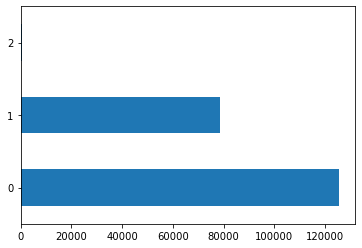

In [316]:
severity['severity'].value_counts().plot(kind='barh')

In [321]:
print(weather.shape)
weather.head()


(204898, 3)


,,ILLUMINATION,WEATHER,ROAD_CONDITION
CRASH_CRN,ROADWAY_CRN,,,
2004000001,2.004000e+09,2,1.0,0.0
2004000010,2.004000e+09,1,1.0,6.0
2004000016,2.004000e+09,2,1.0,0.0
2004000022,2.004000e+09,1,1.0,1.0
2004000030,2.004000e+09,3,1.0,0.0


In [322]:

severity = severity[["severity"]]
print(severity.shape)
severity.head()

(204898, 1)


,,severity
CRASH_CRN,ROADWAY_CRN,
2004000001,2.004000e+09,0
2004000010,2.004000e+09,1
2004000016,2.004000e+09,1
2004000022,2.004000e+09,1
2004000030,2.004000e+09,0


In [324]:
location.shape
location.head()

,,DEC_LAT,DEC_LONG,STREET_NAME
CRASH_CRN,ROADWAY_CRN,,,
2004000001,2.004000e+09,40.3234,-79.9404,LEWIS RUN RD
2004000010,2.004000e+09,40.3182,-79.9076,COAL VALLEY RD
2004000016,2.004000e+09,40.4886,-80.3371,CLINTON FRANKFORT RD
2004000022,2.004000e+09,NaN,NaN,NORTH BALPH AV
2004000030,2.004000e+09,NaN,NaN,THORNBERRY DR


In [325]:
times.dtypes

CRASH_YEAR       int64
CRASH_MONTH      int64
DAY_OF_WEEK      int64
TIME_OF_DAY    float64
HOUR_OF_DAY    float64
dtype: object

In [326]:
times['date'] = times["CRASH_YEAR"].astype(str) +"-"+ times["CRASH_MONTH"].astype(str)

<ipython-input-326-6986ad90e817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times['date'] = times["CRASH_YEAR"].astype(str) +"-"+ times["CRASH_MONTH"].astype(str)


In [327]:
times = times[['DAY_OF_WEEK','HOUR_OF_DAY','date']]

In [328]:
print(times.shape)
times.head()

(204898, 3)


,,DAY_OF_WEEK,HOUR_OF_DAY,date
CRASH_CRN,ROADWAY_CRN,,,
2004000001,2.004000e+09,5,2.0,2004-1
2004000010,2.004000e+09,5,10.0,2004-1
2004000016,2.004000e+09,5,18.0,2004-1
2004000022,2.004000e+09,6,9.0,2004-1
2004000030,2.004000e+09,5,22.0,2004-1


In [336]:
data_frames = [location,severity,weather,times]

In [337]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['CRASH_CRN'],
                                            how='outer'), data_frames)

In [338]:
print(df_merged.shape)
df_merged.head()

(204898, 10)


,DEC_LAT,DEC_LONG,STREET_NAME,severity,ILLUMINATION,WEATHER,ROAD_CONDITION,DAY_OF_WEEK,HOUR_OF_DAY,date
CRASH_CRN,,,,,,,,,,
2004000001,40.3234,-79.9404,LEWIS RUN RD,0,2,1.0,0.0,5,2.0,2004-1
2004000010,40.3182,-79.9076,COAL VALLEY RD,1,1,1.0,6.0,5,10.0,2004-1
2004000016,40.4886,-80.3371,CLINTON FRANKFORT RD,1,2,1.0,0.0,5,18.0,2004-1
2004000022,NaN,NaN,NORTH BALPH AV,1,1,1.0,1.0,6,9.0,2004-1
2004000030,NaN,NaN,THORNBERRY DR,0,3,1.0,0.0,5,22.0,2004-1


In [339]:
df1 = df_merged.dropna()

In [340]:
print(df1.shape)
df1 = df1.rename(columns = {'DEC_LAT':'lat', 
                            'DEC_LONG':'long',
                            'STREET_NAME':'street',
                            'ILLUMINATION':"illumination",
                            'WEATHER':'weather',
                            'ROAD_CONDITION':'road_conditon',
                            'DAY_OF_WEEK':'day',
                            'HOUR_OF_DAY':'hour'
                            
                           })
df1.head()

(182731, 10)


,lat,long,street,severity,illumination,weather,road_conditon,day,hour,date
CRASH_CRN,,,,,,,,,,
2004000001,40.3234,-79.9404,LEWIS RUN RD,0,2,1.0,0.0,5,2.0,2004-1
2004000010,40.3182,-79.9076,COAL VALLEY RD,1,1,1.0,6.0,5,10.0,2004-1
2004000016,40.4886,-80.3371,CLINTON FRANKFORT RD,1,2,1.0,0.0,5,18.0,2004-1
2004000047,40.4188,-80.0494,POPLAR ST,1,1,1.0,0.0,6,14.0,2004-1
2004000071,40.4612,-80.0087,PERRYSVILLE AV,1,3,2.0,1.0,1,19.0,2004-1


<AxesSubplot:ylabel='CRASH_CRN'>

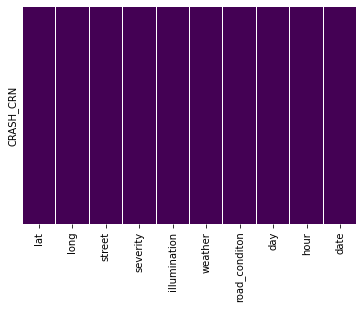

In [341]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [342]:
df1.to_csv('crash_clean.csv')